<a href="https://colab.research.google.com/github/sainath6304796986/Machine-Learning-Assignments/blob/sai/21232_Assignment_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/Health_insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head(5)
#df.region.unique()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()
# finding null values in the data set



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['sex']=label_encoder.fit_transform(df['sex'])
df['smoker']=label_encoder.fit_transform(df['smoker'])

In [ ]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
region=OneHotEncoder().fit(df[['region']])
region.categories_
region_values=region.transform(df[['region']])
region_values.toarray()
df[['region_southwest','region_southeast','region_northwest','region_northeast']]=region_values.toarray()



EDA


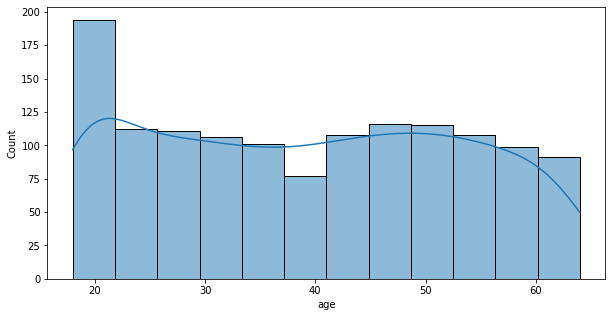

In [ ]:
#bar plot
plt.figure(figsize=(10,5))
g= sns.histplot(df.age,kde=True)




This histplot represents at age of 20 they are paying more insurance


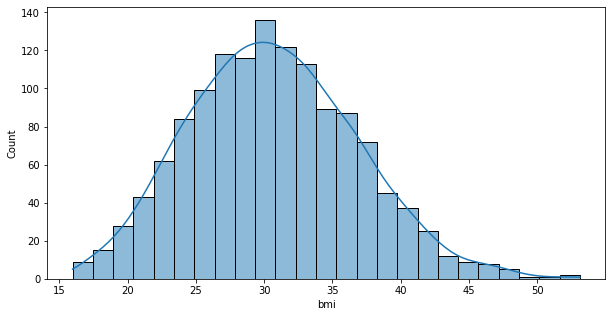

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df,x='bmi',kde=True)

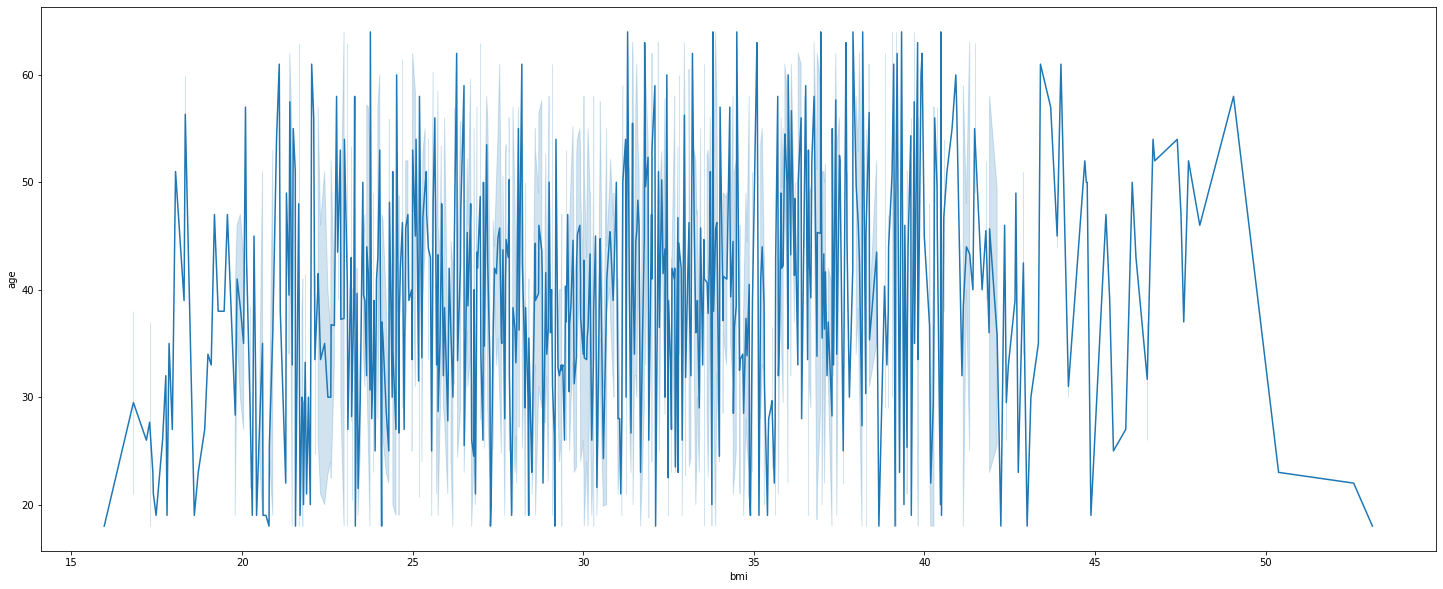

In [ ]:
plt.figure(figsize=(25,10))
sns.lineplot(x='bmi',y='age',data=df)  




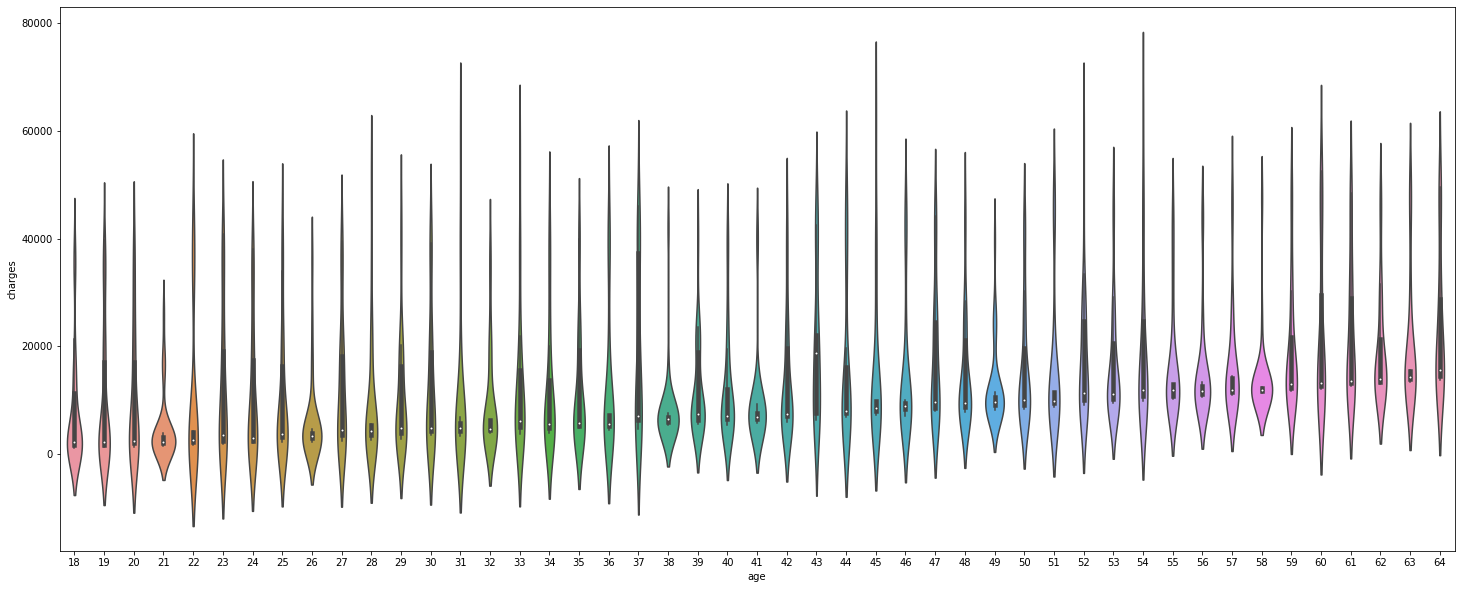

In [ ]:
plt.figure(figsize=(25,10))
sns.violinplot(data=df,x='age',y='charges')

<Figure size 1080x720 with 0 Axes>

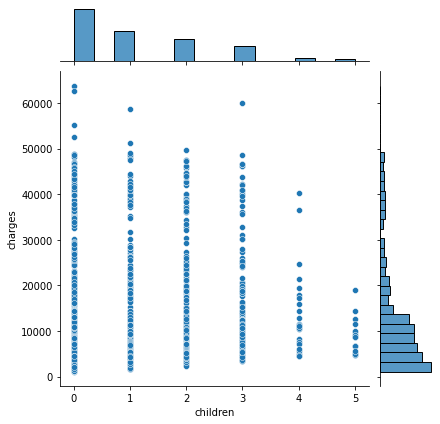

In [ ]:
plt.figure(figsize=(15,10))
sns.jointplot(x='children',y='charges',data=df)

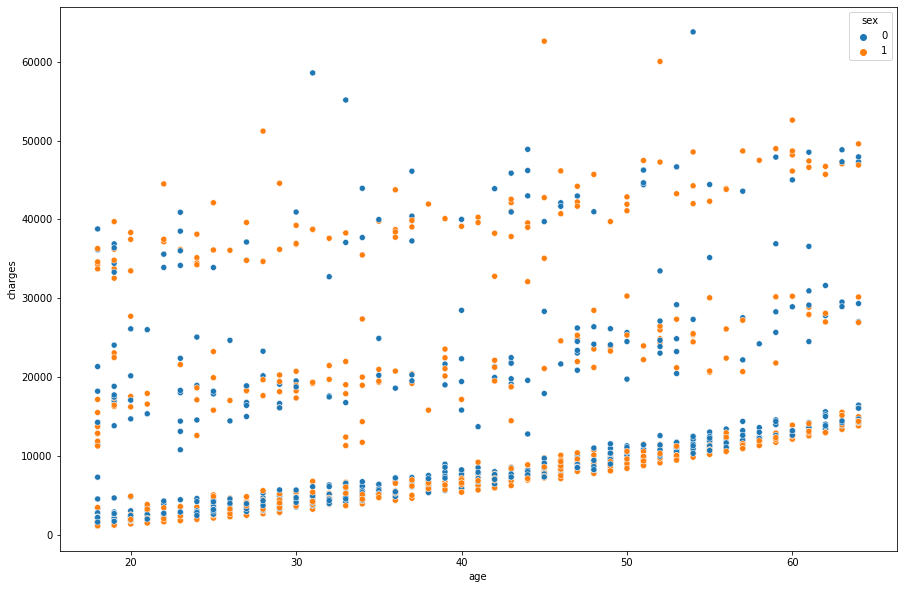

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='age',y='charges',hue='sex',data=df)



In [ ]:
import plotly.express as px
fig=px.pie(df,
           values='charges',
           names='smoker',
           hole=0.5
           )
fig.show()

This pie chart depicts those are not smoking are paying higher charges compared to smokers

In [ ]:
fig=px.pie(df,
           values='charges',
           names='sex',
           hole=0.5
           )
fig.show()

Male are paying more charges compared to female

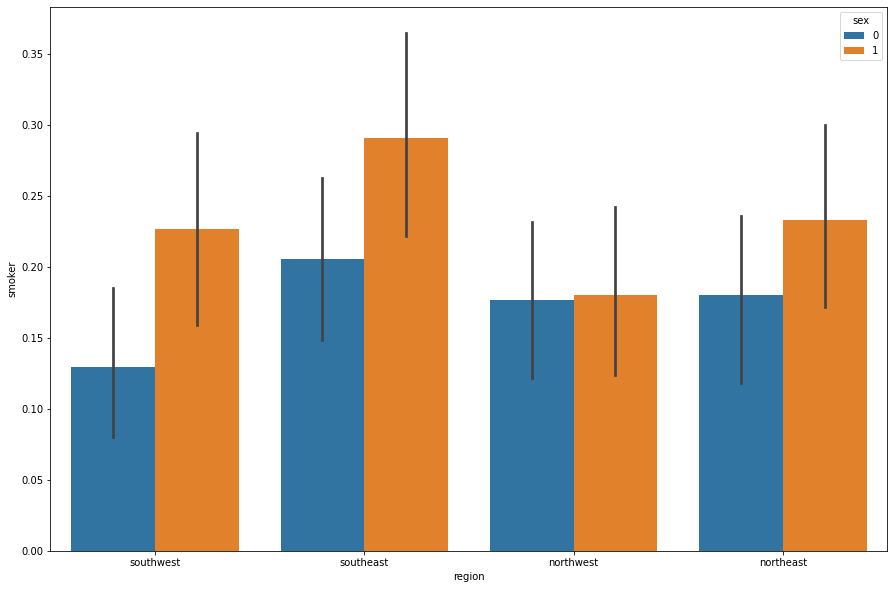

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")
sns.barplot(x='region',y='smoker',hue = 'sex',data=df)



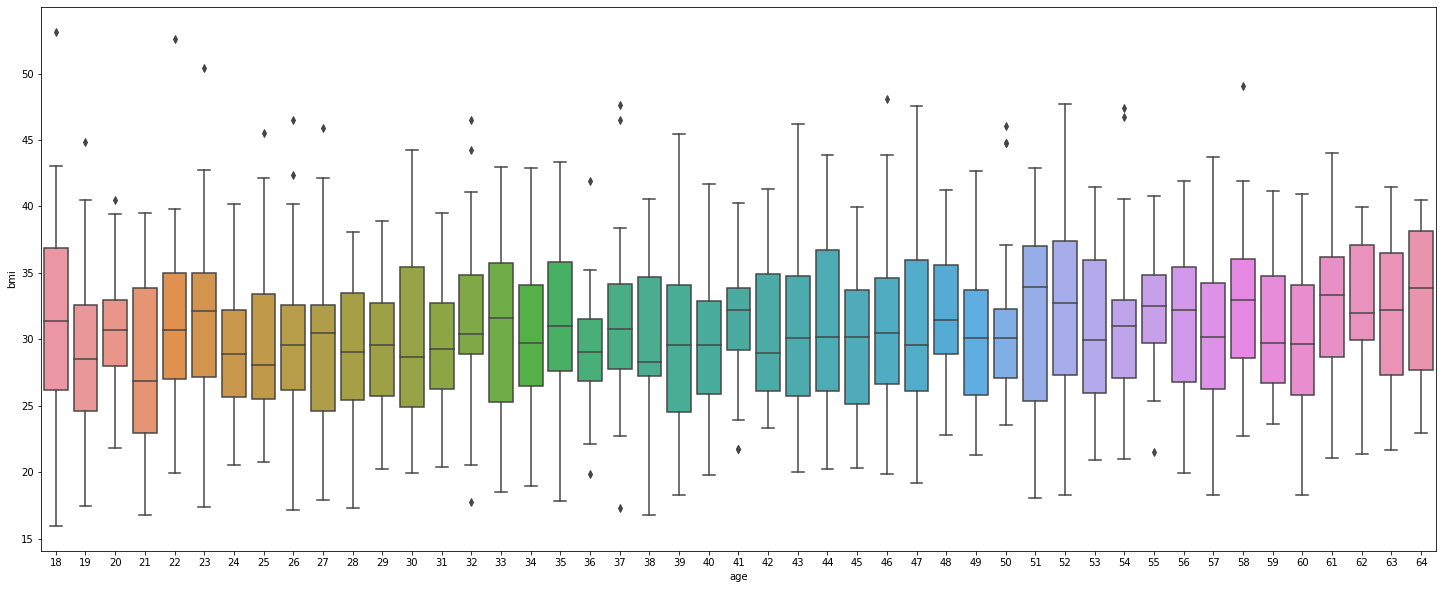

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x='age',y='bmi',data=df)

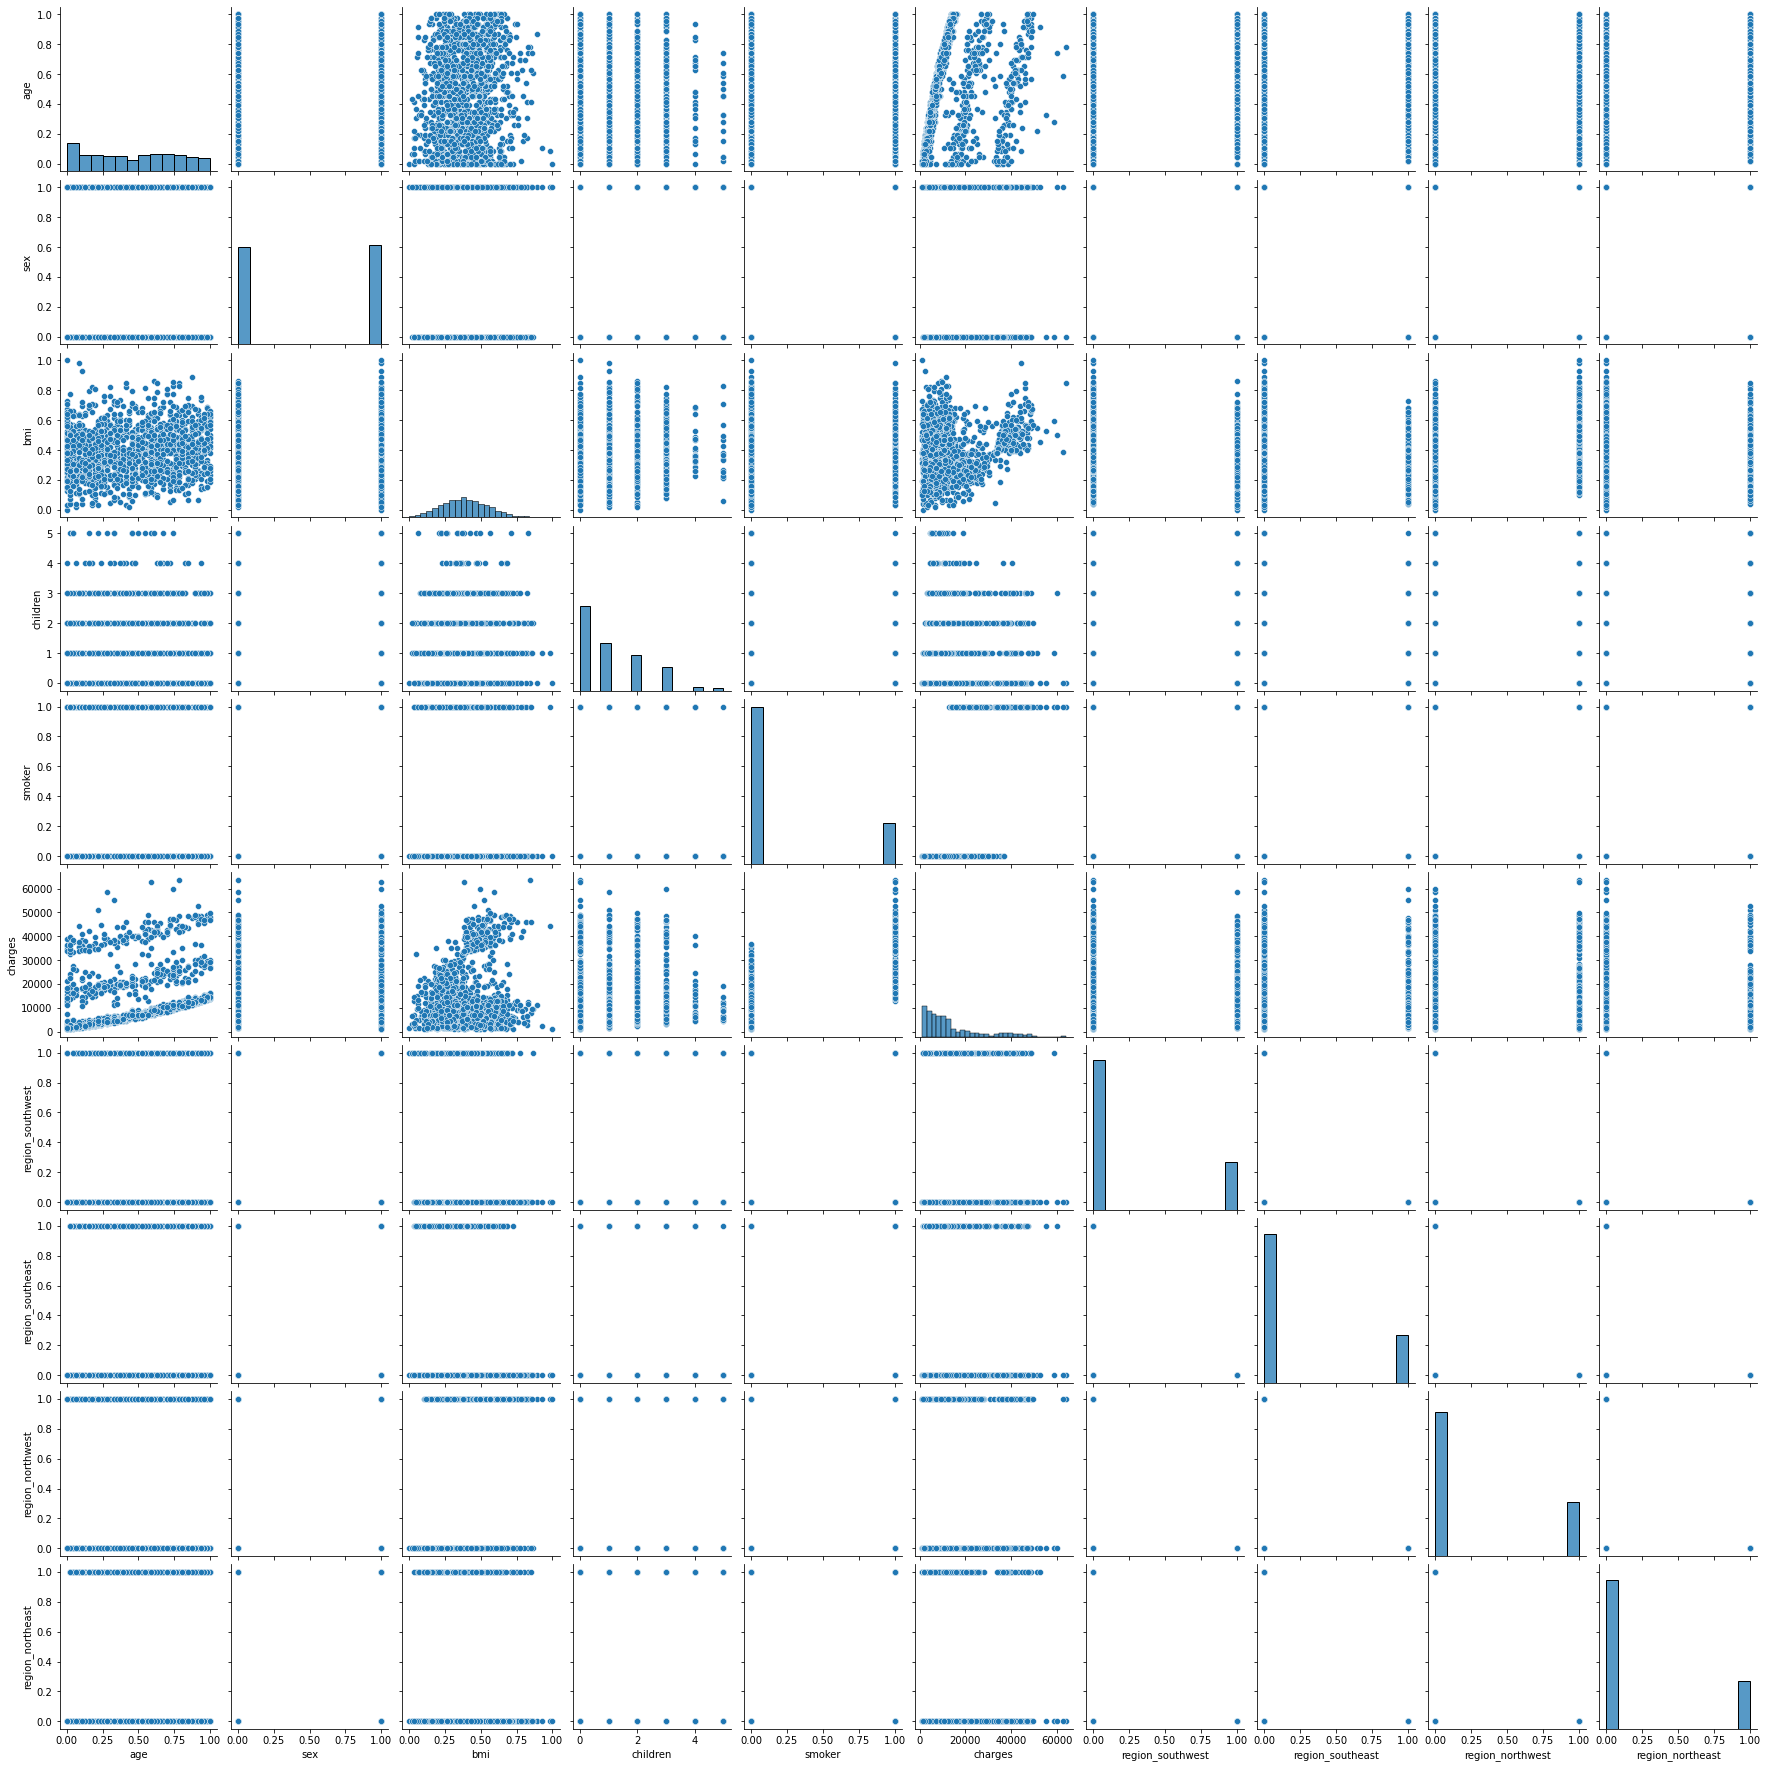

In [ ]:
sns.pairplot(df)

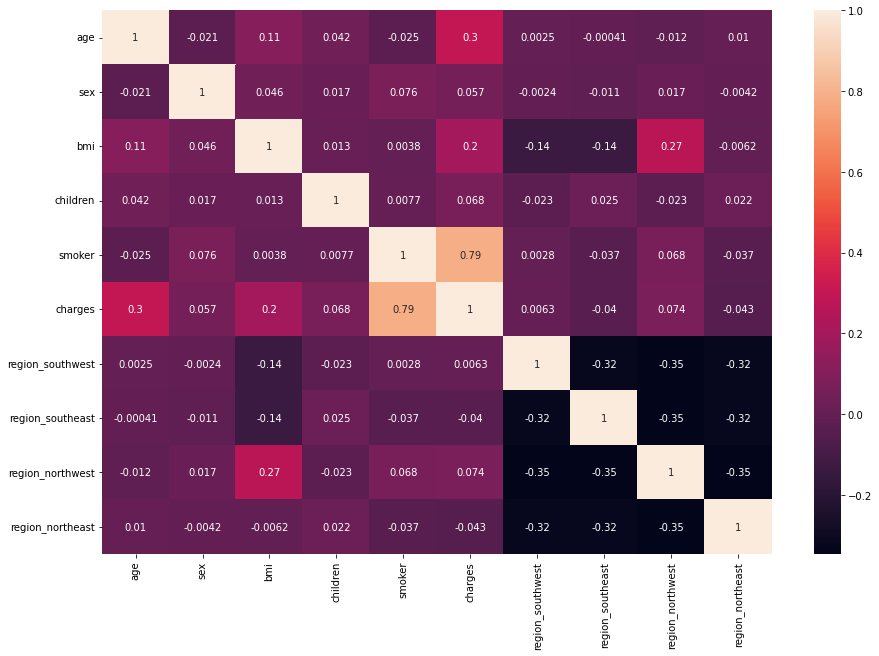

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

There is not much correlation between the variables

In [ ]:
df.drop(columns=['region'],axis=1,inplace=True) 

Selection of Best features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df

,age,sex,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,0.021739,0,0.321227,0,1,16884.92400,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,0.0,0.0,0.0,1.0


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['bmi']])
df['bmi'] = scaler.transform(df[['bmi']])
df

,age,sex,bmi,children,smoker,charges,region_southwest,region_southeast,region_northwest,region_northeast
0,0.021739,0,0.321227,0,1,16884.92400,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,0.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_southwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_northeast  1338 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 104.7 KB


In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [ ]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_southwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_northeast  1338 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 104.7 KB


In [ ]:
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [ ]:
from tqdm import tnrange, tqdm_notebook
import itertools

#Initialize variables 
y = df1.charges
X = df1.drop(columns='charges',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df1 = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  app.launch_new_instance()


Loop...:   0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
df1_min = df1[df1.groupby('numb_features')['RSS'].transform(min) == df1['RSS']]
df1_max = df1[df1.groupby('numb_features')['R_squared'].transform(max) == df1['R_squared']]
df1_max_adj = df1[df1.groupby('numb_features')['Adj_R_squared'].transform(max) == df1['Adj_R_squared']]
display(df1_min.head())
display(df1_max_adj.head(10))


,numb_features,RSS,R_squared,Adj_R_squared,features
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)"
12,2,5.462612e+10,0.721401,0.720983,"(age, smoker)"
53,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker)"
150,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker)"
290,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker, region_southwest)"


,numb_features,RSS,R_squared,Adj_R_squared,features
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)"
12,2,5.462612e+10,0.721401,0.720983,"(age, smoker)"
53,3,4.951322e+10,0.747477,0.746909,"(age, bmi, smoker)"
150,4,4.907845e+10,0.749695,0.748943,"(age, bmi, children, smoker)"
290,5,4.893430e+10,0.750430,0.749493,"(age, bmi, children, smoker, region_southwest)"
416,6,4.884618e+10,0.750879,0.749756,"(age, bmi, children, smoker, region_southwest,..."
465,7,4.884047e+10,0.750908,0.749597,"(age, sex, bmi, children, smoker, region_south..."
501,8,4.883953e+10,0.750913,0.749414,"(age, sex, bmi, children, smoker, region_south..."
502,8,4.883953e+10,0.750913,0.749414,"(age, sex, bmi, children, smoker, region_south..."
503,8,4.883953e+10,0.750913,0.749414,"(age, sex, bmi, children, smoker, region_south..."


In [ ]:
df1['min_RSS'] = df1.groupby('numb_features')['RSS'].transform(min)
df1['max_R_squared'] = df1.groupby('numb_features')['R_squared'].transform(max)
df1.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765
1,1,1.954306e+11,0.003282,0.002536,"(sex,)",7.455432e+10,0.619765
2,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765
3,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)",7.455432e+10,0.619765


In [ ]:
df1['min_RSS'] = df1.groupby('numb_features')['RSS'].transform(min)
df1['max_R_squared'] = df1.groupby('numb_features')['R_squared'].transform(max)
df1['max_Adj_R_squared'] = df1.groupby('numb_features')['Adj_R_squared'].transform(max)
df1.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765,0.61948
1,1,1.954306e+11,0.003282,0.002536,"(sex,)",7.455432e+10,0.619765,0.61948
2,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765,0.61948
3,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765,0.61948
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)",7.455432e+10,0.619765,0.61948


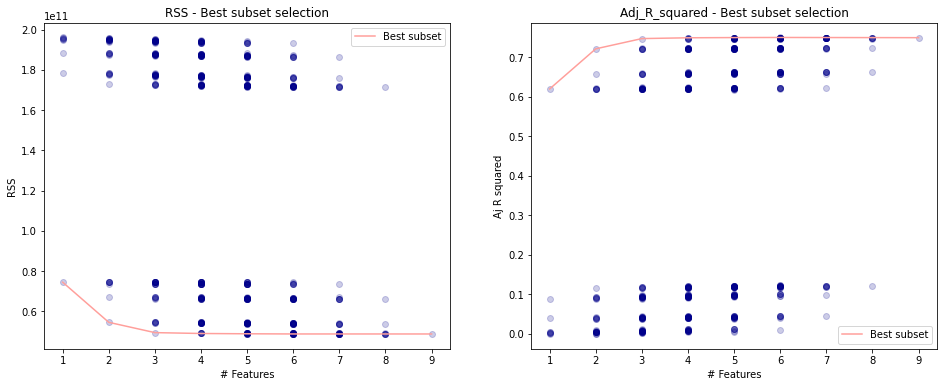

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_southwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_northeast  1338 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 104.7 KB


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df1.numb_features,df1.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df1.numb_features,df1.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df1.numb_features,df1.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df1.numb_features,df1.max_Adj_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')
ax.legend()

plt.show()


In [ ]:
df

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,1.785440e+11,0.089406,0.088724,"(age,)",7.455432e+10,0.619765,0.619480
1,1,1.954306e+11,0.003282,0.002536,"(sex,)",7.455432e+10,0.619765,0.619480
2,1,1.883608e+11,0.039339,0.038620,"(bmi,)",7.455432e+10,0.619765,0.619480
3,1,1.951676e+11,0.004624,0.003879,"(children,)",7.455432e+10,0.619765,0.619480
4,1,7.455432e+10,0.619765,0.619480,"(smoker,)",7.455432e+10,0.619765,0.619480
...,...,...,...,...,...,...,...,...
506,8,4.928383e+10,0.748647,0.747134,"(age, sex, bmi, smoker, region_southwest, regi...",4.883953e+10,0.750913,0.749414
507,8,5.400876e+10,0.724549,0.722891,"(age, sex, children, smoker, region_southwest,...",4.883953e+10,0.750913,0.749414
508,8,4.884525e+10,0.750884,0.749384,"(age, bmi, children, smoker, region_southwest,...",4.883953e+10,0.750913,0.749414
509,8,6.596401e+10,0.663576,0.661551,"(sex, bmi, children, smoker, region_southwest,...",4.883953e+10,0.750913,0.749414


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["age","sex","bmi","children","smoker","region_southwest","region_southeast","region_northwest","region_northeast"]]
y = df.charges

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression() 
model.fit(Xtrain,ytrain)  
model

LinearRegression()

In [ ]:
def adj_r_sqr(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [ ]:
adj_r_sqr(Xtrain,ytrain,Xtest,ytest)

(0.7571844792329658, 0.6996707953393209)

In [ ]:
model.score(Xtrain,ytrain)

0.7592287633180017

In [ ]:
model.score(Xtest,ytest)

0.7097942516761977

In [ ]:
yhat = model.predict(Xtest)
results= pd.DataFrame({"y":ytest,"yhat":yhat})
results.head()

,y,yhat
261,17085.2676,25596.295587
370,13415.0381,10603.552196
1006,4438.2634,5802.795234
1274,17043.3414,26688.895359
1014,5383.5360,6573.397007


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [ ]:
def adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [ ]:
adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest)

(0.749980552167774, 0.7335412244855524)